# The Pi-Mu-e Experiment: Dan & Robert

# Introduction / Abstract
   During the collision of particles. Unstable 'elementary' particles may be produced from the interaction with cosmic rays or other large accelerators. These interactions have brought what we thought to be mass less objects, to a scale more precise and meaningful. Using their properties of mass, charge, mean life until decay, decay products, interaction with other particles, distances traveled and other properties that are relevant. Also using the muon to find it mean life demonstrates how time dilation effect of special relativity. We have concluded that the mass of a Pion is approximatlly 146 Mev/c^2

# Procedure
   To start off the experiment, we are required to approximate the mass of the Pion from analysis of photographs of a bubble chamber, in which the pion decayed in. We were given that the pion decays into a muon and a neutrino, from there the muon decays into a neutrino and a positron. We know from the conservation of energy that the total energy in the system must equal the energy from the sum of each particles energy. Using the relativistic Energy equation, we can determine that the energy from the muon and the momentum from the neutrino from the decay of the pion, can both be used to find the mass of the pion by measuring the radius that the pion traveled and the track left by the muon in the bubble chamber after solving the equation in terms that have known values.

# Data

The following data below is in tables that sort the lengths and radius to give us a mean value for each quantity to then be inserted into a function to find the mass of the pion. Also

In [10]:
from astropy.io import ascii
data = ascii.read('data.csv')
data

page,length,radius
float64,float64,float64
5771.0,0.65,9.0
5771.0,0.75,15.0
5771.0,0.55,16.0
5917.0,1.3,16.0
5917.0,1.2,17.0
5917.0,1.3,18.0
5780.0,1.0,14.0
5780.0,0.75,15.0
5780.0,0.5,11.0


# Analysis / Calculations


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
from matplotlib import pyplot
%matplotlib inline

In [12]:
R = np.mean(data['radius']/.785) #13.9
L = np.mean(data['length']/.785)
print(R)
print(L)

c = 1 #2.998 * 10**8 m/s
rho = 0.07 # kg/m^3
e = 3 * 10**-4 
B = 8800 # Gauss
m = (3*R*B*e)/c #kg
T = np.sqrt(2.1*m*(c**2)*rho*L)
P = np.sqrt((T**2) + (2*T*m*(c**2)))/c

mp = (np.sqrt(((P*c)**2) + (m*(c**2))**2) + (P*c)) / (c**2)
print(mp)

13.8853503185
1.29839316734
146.62602013


In [13]:
data2 = ascii.read('exp_data.csv')
data2

delta_t,timestamp
int32,int32
900,1442521310
5420,1442521318
1860,1442521320
8100,1442521322
2880,1442521331
6700,1442521344
3140,1442521360
5640,1442521361
7100,1442521367


(array([ 19638.,  11045.,   8623.,   7865.,   7458.,   7378.,   7215.,
          7231.,   7376.,   7351.]),
 array([    40.,   2034.,   4028.,   6022.,   8016.,  10010.,  12004.,
         13998.,  15992.,  17986.,  19980.]),
 <a list of 10 Patch objects>)

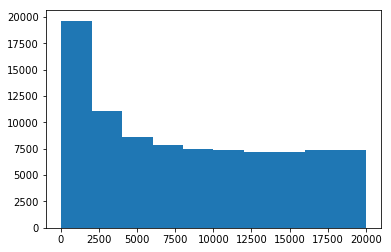

In [14]:
x = data2['delta_t']
plt.hist(x)

In [15]:
def func(x, a, b):

return a*x + b

popt, pcov = curve_fit(func, r, l)


plt.plot(x, y, '-')
plt.text(0.5*10**-8, 30, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
plt.text(0.5*10**-8, 20, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.grid()
plt.title('Change in Time vs Change in Distance Travelled')
plt.plot(r, l, 'rs')
plt.xlabel('Change in Distance (m)')
plt.ylabel('Change in Time (ns)')
plt.show()

IndentationError: expected an indented block (<ipython-input-15-81dfa363f5ec>, line 3)

# Conclusion
   With the accepted value for the mass of a Pion being 139.57018 EE (35) MeV/c^2 and our value for the mass of the pion being 146.62602 EE (35) MeV/c^2, we have a percent error for the measuring of the mass to be approximately 5%. Some of our sources of error could come from the amount of people that we had measuring the lengths and radius of the arcs. The random error in the collective measurements would lead to some uncertainty in the final value of the calculation. Also, some people used different units and then converted at the end to find an average value that was used in the calculation.
    


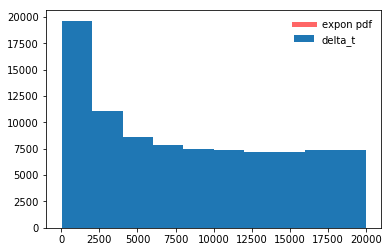

(array([ 19638.,  11045.,   8623.,   7865.,   7458.,   7378.,   7215.,
          7231.,   7376.,   7351.]),
 array([    40.,   2034.,   4028.,   6022.,   8016.,  10010.,  12004.,
         13998.,  15992.,  17986.,  19980.]),
 <a list of 10 Patch objects>)

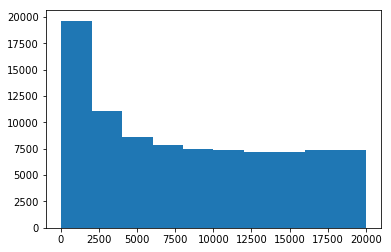

In [27]:
#create figure
fig, ax = plt.subplots(1, 1)

#create random data drawn from an exponential
r = np.sort(expon.rvs(size=1000))

#create expontial function
ax.plot(r, expon.pdf(r),'r-', lw=5, alpha=0.6, label='expon pdf')

#add histogram to plot
ax.hist(x, normal)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

plt.show()
#print(expon.pdf(r))

